In [1]:
import ipyvolume as ipv
import itkwidgets as itkw
import numpy as np
from nanomesh import NanoMesher
from nanomesh import sitk_filter
from nanomesh.utils import show_slice, show_volume, generate_mesh_from_binary_image

The 'numba.jitclass' decorator has moved to 'numba.experimental.jitclass' to better reflect the experimental nature of the functionality. Please update your imports to accommodate this change and see https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#change-of-jitclass-location for the time frame.


In [2]:
mesh = NanoMesher()
mesh.load_bin("sample_data.vol",size=[200,200,200], input_dtype=np.uint8, output_dtype=np.float32)
show_slice(mesh.volume.img,'z',scale=1)

interactive(children=(IntSlider(value=99, description='z', max=199), Output()), _dom_classes=('widget-interact…

In [28]:
mesh.apply_gaussian_filtering(sigma=5.)
show_slice(mesh.volume.img,'z')

interactive(children=(IntSlider(value=99, description='z', max=199), Output()), _dom_classes=('widget-interact…

In [33]:
show_volume(mesh.volume.img)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageUC3; pr…

In [29]:
inner = sitk_filter.binary_threshold(mesh.volume.img, lowerThreshold=0, upperThreshold=125, insideValue=1, outsideValue=0)
show_slice((mesh.volume.img, inner), dim='z', title="Inner regions")

interactive(children=(IntSlider(value=99, description='z', max=199), Output()), _dom_classes=('widget-interact…

In [30]:
show_volume(inner)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageUC3; pr…

In [7]:
inner_mesh = generate_mesh_from_binary_image(inner)

In [8]:
import pyvista as pv
pv.plot_itk(inner_mesh)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [9]:
import meshio
meshio.write('inner.vtk',inner_mesh)

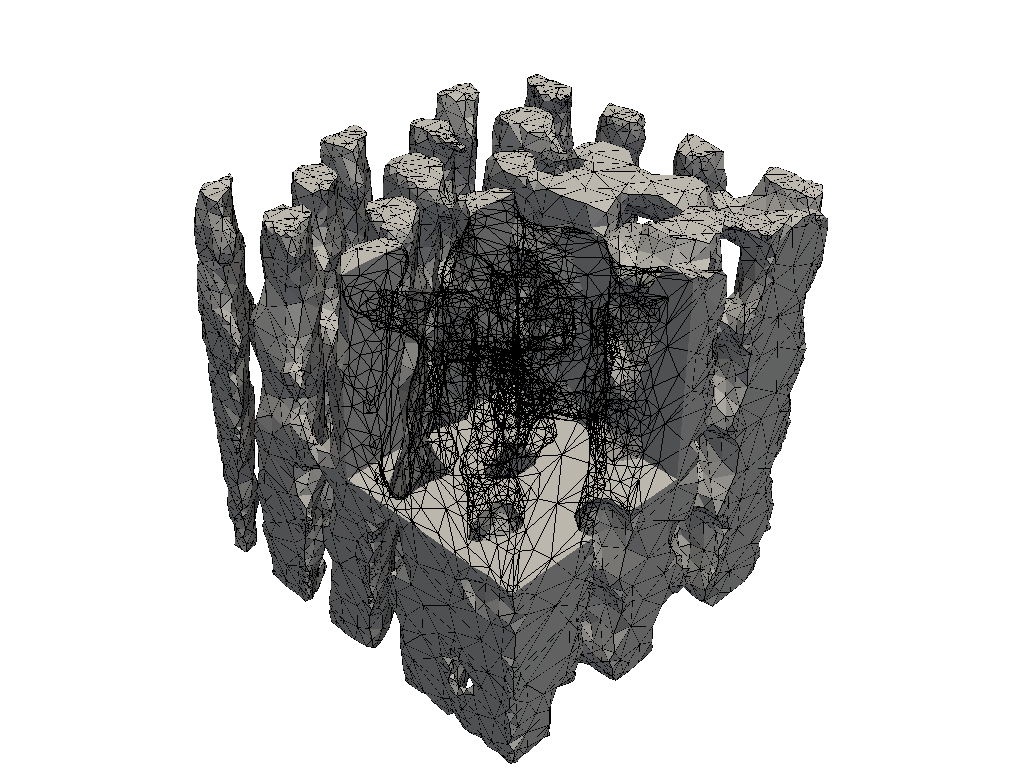

In [24]:
inner_mesh = pv.read('inner.vtk')

bounds = [100,200,100,200,100,200]
clipped = mesh.clip_box(bounds)

pv.set_plot_theme("document")

p = pv.Plotter(notebook=True)

p.add_mesh(mesh, style='wireframe', color='black')
p.add_mesh(clipped,  color='lightgrey')
p.show()

In [34]:
two_phase = sitk_filter.binary_threshold(mesh.volume.img, lowerThreshold=0, upperThreshold=125, insideValue=1, outsideValue=2)
show_slice((mesh.volume.img, two_phase), dim='z', title="Binary Thresholding")

interactive(children=(IntSlider(value=99, description='z', max=199), Output()), _dom_classes=('widget-interact…

In [15]:
show_volume(two_phase)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageUC3; pr…

In [35]:
two_phase_mesh = generate_mesh_from_binary_image(two_phase)

In [17]:
pv.plot_itk(two_phase_mesh)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [36]:
import meshio
meshio.write('twophase.vtk',two_phase_mesh)

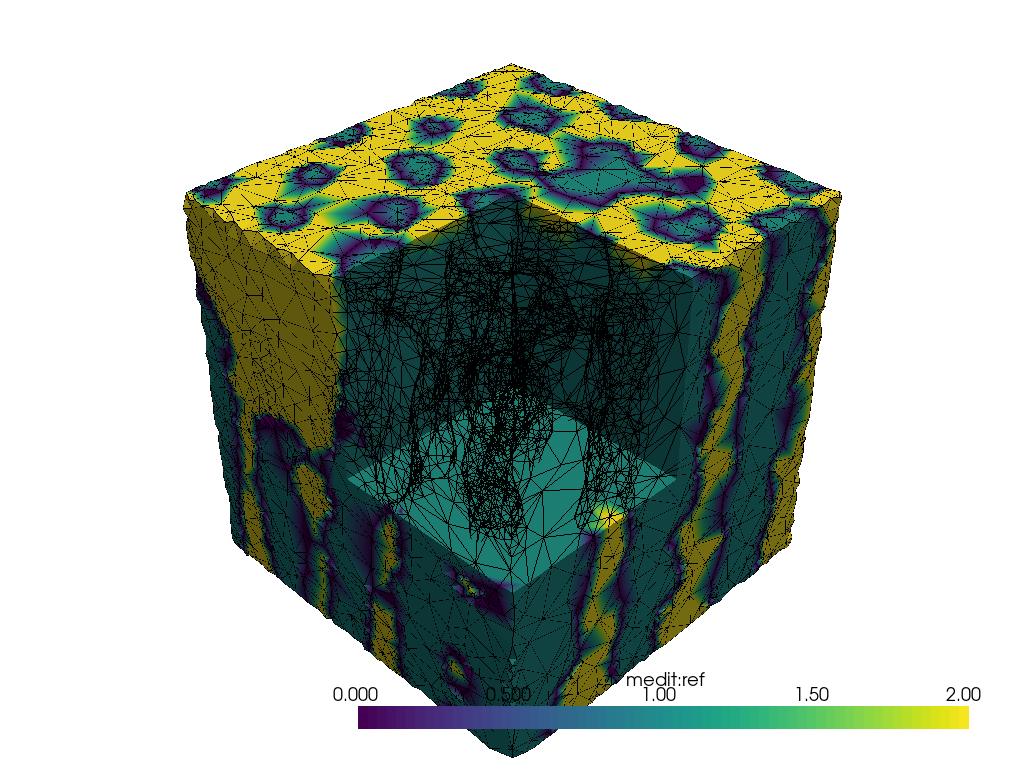

In [38]:

mesh = pv.read('twophase.vtk')

bounds = [100,200,100,200,100,200]
clipped = mesh.clip_box(bounds)
pv.set_plot_theme("document")

p = pv.Plotter(notebook=True)
p.add_mesh(mesh, style='wireframe', color='black')
p.add_mesh(clipped)
p.show()
